In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Input
from tensorflow.keras.utils import to_categorical

(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train/255
X_test=X_test/255
y_test_cat=to_categorical(y_test,num_classes=10)
y_train_cat=to_categorical(y_train,num_classes=10)

model=Sequential()
model.add(Input(shape=(28,28,1)))
model.add(Conv2D(28,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history=model.fit(X_train,y_train_cat,validation_split=0.2,epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8995 - loss: 0.3391 - val_accuracy: 0.9772 - val_loss: 0.0794
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9829 - loss: 0.0579 - val_accuracy: 0.9835 - val_loss: 0.0557
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9899 - loss: 0.0341 - val_accuracy: 0.9835 - val_loss: 0.0607
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9936 - loss: 0.0215 - val_accuracy: 0.9852 - val_loss: 0.0508
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9955 - loss: 0.0141 - val_accuracy: 0.9858 - val_loss: 0.0555
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9964 - loss: 0.0110 - val_accuracy: 0.9833 - val_loss: 0.0670
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.9847 - val_loss: 0.0631
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9982 -

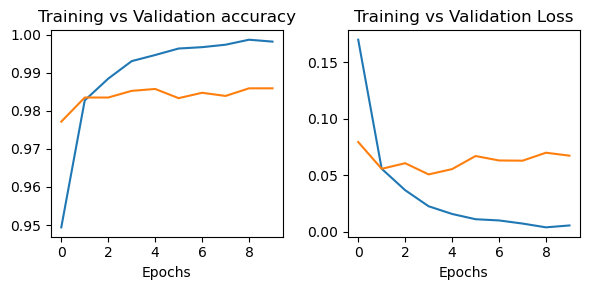

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


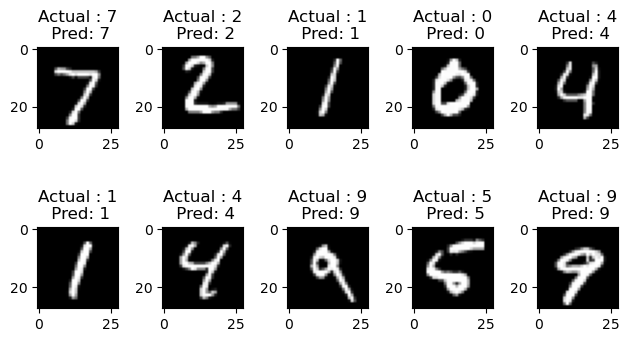

In [71]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation accuracy")
plt.xlabel("Epochs")
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.tight_layout()
plt.show()

for i in range(10):
    test=X_test[i]
    pred=np.argmax(model.predict(test.reshape(1,28,28)))
    plt.subplot(2,5,i+1)
    plt.imshow(test,cmap='gray')
    plt.title(f"Actual : {y_test[i]}\n Pred: {pred}")
    plt.tight_layout()

In [15]:
history.history

{'accuracy': [0.9493958353996277,
  0.9827499985694885,
  0.9884583353996277,
  0.9930624961853027,
  0.9946666955947876,
  0.9963750243186951,
  0.9967291951179504,
  0.9973750114440918,
  0.9986875057220459,
  0.9981874823570251],
 'loss': [0.16991445422172546,
  0.055769361555576324,
  0.03682504594326019,
  0.022600268945097923,
  0.015796616673469543,
  0.011133948341012001,
  0.010070553049445152,
  0.0073066954500973225,
  0.00395993422716856,
  0.005622727796435356],
 'val_accuracy': [0.9771666526794434,
  0.9835000038146973,
  0.9835000038146973,
  0.9852499961853027,
  0.9857500195503235,
  0.9833333492279053,
  0.984749972820282,
  0.9839166402816772,
  0.9859166741371155,
  0.9859166741371155],
 'val_loss': [0.07941488921642303,
  0.055730052292346954,
  0.060686346143484116,
  0.05077880248427391,
  0.055479831993579865,
  0.06703852117061615,
  0.06310688704252243,
  0.06291013956069946,
  0.06996192783117294,
  0.0673585757613182]}